Curvature matrix α: 
 [[    2.       97.498]
 [   97.498  6251.416]]
Gradient vector β: 
 [ -19.073 -374.157]
Covarience matrix: 
 [[ 2.086 -0.033]
 [-0.033  0.001]]
Fitted parameters: 
 [-27.611   0.371]
a0 is -27.61 ± 1.44
a1 is 0.37 ± 0.03
        χ2 is 55.7842090928 
Reduced χ2 is 1.1868980658
The fit appears to be appropriate.


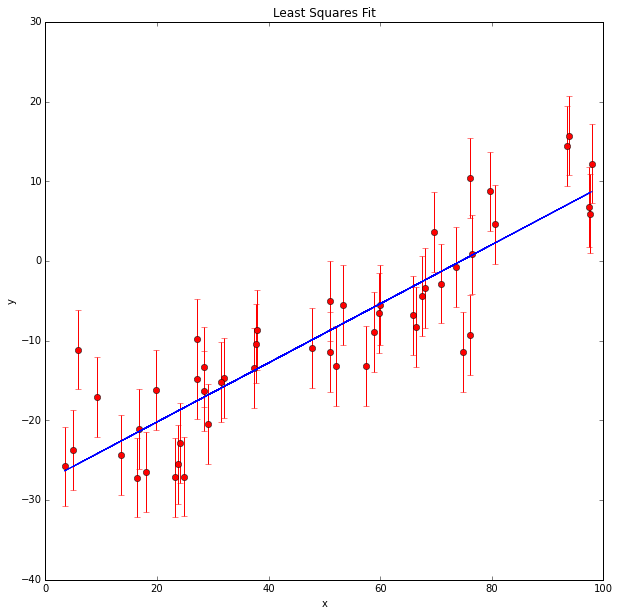

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456
"""

"""
Cordell Newmiller
Prof. Fassnacht
PHY 266
Homework 4
Problem 2



On the course smartsite under Homework→Data, you will find a file called xy
fitting.txt. This file contains a list of xi and yi coordinates. As noted 
at the beginning of the file, the uncertainties on all the yi values is the
same, and has the value given in the file. In this problem you are going to 
fit a line to the data, and then explore the confidence regions. 
"""
import numpy
from matplotlib import pyplot
%matplotlib inline

def tripledot(A,B,C):
    return (numpy.dot(A,numpy.dot(B,C)))

# Assumes the file is in the working directory
data=numpy.loadtxt('xy_fitting.txt')
xdata=data[:,0]
ydata=data[:,1]
ysigmas=numpy.zeros(ydata.size)+5.0

"""
(a) The model that you are going to fit is y = a0 + a1x. Since this is a 
linear model, you can use the method that I described in class with the 
curvature matrix, α, and the β~ vector. Recall that these depend only on 
the data: xi, yi and σi. For this problem, α will be a 2x2 matrix and β 
will have two elements. Calculate α and β and report the values of their 
elements.
"""

# Making the weights into a diagonal matrix lets us do this fit with 
# matrix operations instead of for loops. 
weights=numpy.diag(1/(ysigmas**2))

# This code ought to easily generalize to higher order polynomials
numberofparameters=2   #linear fit

# Generate monomial dy/da factors. dy/da0=1, dy/da1=x, dy/da2=x^2, etc.
derivatives=numpy.zeros((xdata.size,numberofparameters))
for i in range(0,numberofparameters):
    derivatives[:,i]=xdata**i 


# Curvature matrix
alpha = tripledot(derivatives.T,weights,derivatives)

# Gradient vector
beta = tripledot(ydata,weights,derivatives)

# Suppress scientific notation output
numpy.set_printoptions(suppress=True,precision=3) 
print("Curvature matrix α: \n",alpha)
print("Gradient vector β: \n",beta)


"""
(b) Now do the necessary inversion to solve for both the covariance matrix 
C and the model parameters a0 and a1:
a = α^−1 · β
Note that numpy has matrix inversion routines. Give both the full 
covariance matrix and the best-fit parameters ˆa0 and ˆa1 along with their 
errors σa0 and σa1.
"""

covariencematrix=numpy.linalg.inv(alpha)

# Parameters a
parameters = numpy.dot(covariencematrix,beta.T)
psigmas = (numpy.diag(covariencematrix))**0.5

print("Covarience matrix: \n",covariencematrix)
print("Fitted parameters: \n",parameters)
for i in range(0,numberofparameters):
    #print("a",i," is ",parameters[i]," ± ",psigmas[i],sep="")
    print("a%s is %2.2f ± %2.2f" % (i, parameters[i], psigmas[i]))

"""
(c) Plot the data points along with the measurement errors, and then draw 
the line y = a0 + a1x.
"""

ymodel=numpy.zeros(xdata.size)
for i in range(0,numberofparameters):
    ymodel=ymodel+parameters[i]*xdata**i

figure1 = pyplot.figure(figsize=(10,10));
pyplot.errorbar(xdata,ydata,yerr=ysigmas,fmt='ro');
pyplot.plot(xdata,ymodel,'b');
pyplot.title('Least Squares Fit')
pyplot.xlabel('x')
pyplot.ylabel('y')


"""
(d) Compute χ2 and the reduced χ2 (i.e., χ2ν) for this model. 
Is this a good fit?
"""

chisquared=numpy.sum(((ydata-ymodel)/ysigmas)**2)
reducedchisquared=chisquared/(xdata.size-numberofparameters-1)

print("        χ2 is",chisquared,"\nReduced χ2 is",reducedchisquared)

if reducedchisquared < 1:
    print("The data might be over-fitted.")
elif reducedchisquared < 2:
    print("The fit appears to be appropriate.")
else:
    print("The fit is not very good.")

# Reset printoptions to default, useful when working in notebook
numpy.set_printoptions(suppress=False,precision=8) 